In [43]:
# dataframes 
import numpy as np
# import pandas as pd
import polars as pd

# cargar archivos
import uproot
from tqdm import tqdm # sirve para ver la linea de carga al cargar los archivos
import yaml

# gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

# funcion de xgboost que clasifica
from xgboost import XGBClassifier
import xgboost as xgb

# graficar el arbol de desiciones del modelo, rcparams es para que se vea HD
from xgboost import plot_tree
from matplotlib.pylab import rcParams

# medir que tan bueno es el modelo
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# encontrar mejor modelo (validacion)
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score

# ver la prueba de ks
from scipy.stats import kstest

# funciones creadas
import sys
sys.path.append('../') # los archivos están en la carpeta anterior
from lectura import *
from formulas import *
from cortes import *
from graficar import *
from machine_learning import *
from metricas import *

# para recargar los modulos mientras los voy debugeando
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
########################################################
########### LECTURA DATOS PREVIOS YAML #################
########################################################

# cargar archivo yaml
path = "/home/tomilee/Desktop/Universidad/dark_photons/proyecto_investigacion/codigo/"
data_yaml = read_data_yaml('../parametros_ml_after_cut.yaml')      #Parámetros del calo

# de data_yaml obtenemos los nombres de los datasets
vbf_data = data_yaml['VBF'].values() #esto devuelve solo los valores de cada variable.
ggf_data = data_yaml['ggF'].values() #esto devuelve solo los valores de cada variable.

# de data_yaml obtenemos los nombres de las variables
variables = data_yaml['recover_branches']
# de data_yaml obtenemos las escalas de las variables
scales = data_yaml['scale_variable']

# de data_yaml obtenemos los nombres de los cortes y los valores de los cortes menores y mayores
cuts = data_yaml['cuts']

In [45]:
########################################################
############# LECTURA DATOS ROOT FILES #################
########################################################
df_all = read_datasets(vbf_data, ggf_data, variables, scales, path)
df_all

  0%|          | 0/8 [00:00<?, ?it/s]

 12%|█▎        | 1/8 [00:00<00:02,  3.29it/s]

samples/VBF/frvz_vbf_500757


 25%|██▌       | 2/8 [00:00<00:01,  3.27it/s]

samples/VBF/frvz_vbf_500758


 38%|███▊      | 3/8 [00:00<00:01,  3.29it/s]

samples/VBF/frvz_vbf_500759


 50%|█████     | 4/8 [00:01<00:01,  3.35it/s]

samples/VBF/frvz_vbf_500760


 62%|██████▎   | 5/8 [00:01<00:00,  3.37it/s]

samples/VBF/frvz_vbf_500761


 75%|███████▌  | 6/8 [00:01<00:00,  3.37it/s]

samples/VBF/frvz_vbf_500762


 88%|████████▊ | 7/8 [00:02<00:00,  3.40it/s]

samples/VBF/frvz_vbf_500763


100%|██████████| 8/8 [00:02<00:00,  3.37it/s]


samples/VBF/frvz_vbf_500764


100%|██████████| 9/9 [00:04<00:00,  1.87it/s]


njet30          mjj      detajj  \
origin df_name                                                        
VBF    samples/VBF/frvz_vbf_500757       2  1316.194214    5.130603   
       samples/VBF/frvz_vbf_500757       7  2287.880371    7.156201   
       samples/VBF/frvz_vbf_500757       2  1568.506470    6.255918   
       samples/VBF/frvz_vbf_500757       4   471.740875    1.960242   
       samples/VBF/frvz_vbf_500757       8  1150.059692    4.557185   
...                                    ...          ...         ...   
ggF    samples/ggF/frvz_ggf_508893       1    -0.999000 -999.000000   
       samples/ggF/frvz_ggf_508893       3   240.689178    1.942230   
       samples/ggF/frvz_ggf_508893       2   143.422470    2.548514   
       samples/ggF/frvz_ggf_508893       0    -0.999000 -999.000000   
       samples/ggF/frvz_ggf_508893       0    -0.999000 -999.000000   

                                        dphijj         MET  scale1fb  \
origin df_name                                                         
VBF    samples/VBF/frvz_vbf_500757    1.032967  177.043106  0.000486   
       samples/VBF/frvz_vbf_500757   -2.580441  101.195091  0.000502   
       samples/VBF/frvz_vbf_500757   -1.375577  130.909744  0.000429   
       samples/VBF/frvz_vbf_500757    2.980181  491.291687  0.000531   
       samples/VBF/frvz_vbf_500757    2.197970  115.439743  0.000014   
...                                        ...         ...       ...   
ggF    samples/ggF/frvz_ggf_508893 -999.000000   40.554482  0.028479   
       samples/ggF/frvz_ggf_508893    0.768057   76.802452  0.029882   
       samples/ggF/frvz_ggf_508893    2.000947   26.644657  0.029517   
       samples/ggF/frvz_ggf_508893 -999.000000   10.709071  0.029929   
       samples/ggF/frvz_ggf_508893 -999.000000   10.808948  0.030318   

                                      intLumi        jet1_pt    jet1_eta  \
origin df_name                                                             
VBF    samples/VBF/frvz_vbf_500757  44.299999  104969.406250   -3.187121   
       samples/VBF/frvz_vbf_500757  44.299999   72039.820312    3.637084   
       samples/VBF/frvz_vbf_500757  44.299999  120273.304688   -2.382490   
       samples/VBF/frvz_vbf_500757  44.299999  178915.984375    1.259632   
       samples/VBF/frvz_vbf_500757  44.299999  189834.156250   -2.913896   
...                                       ...            ...         ...   
ggF    samples/ggF/frvz_ggf_508893  58.450001   33552.746094    0.995871   
       samples/ggF/frvz_ggf_508893  58.450001  125251.289062   -2.288580   
       samples/ggF/frvz_ggf_508893  58.450001   40318.128906   -3.305732   
       samples/ggF/frvz_ggf_508893  58.450001    -999.000000 -999.000000   
       samples/ggF/frvz_ggf_508893  58.450001    -999.000000 -999.000000   

                                      jet1_phi        jet1_e        jet2_pt  \
origin df_name                                                                
VBF    samples/VBF/frvz_vbf_500757   -0.087903  1.273288e+06   98169.875000   
       samples/VBF/frvz_vbf_500757    0.712928  1.369027e+06   56599.265625   
       samples/VBF/frvz_vbf_500757   -2.404870  6.569827e+05   39280.699219   
       samples/VBF/frvz_vbf_500757   -2.167910  3.411552e+05  133583.312500   
       samples/VBF/frvz_vbf_500757   -1.059290  1.754382e+06   72083.078125   
...                                        ...           ...            ...   
ggF    samples/ggF/frvz_ggf_508893   -2.499207  5.242589e+04    -999.000000   
       samples/ggF/frvz_ggf_508893    1.335905  6.239932e+05   79405.820312   
       samples/ggF/frvz_ggf_508893    0.382778  5.504859e+05   36411.175781   
       samples/ggF/frvz_ggf_508893 -999.000000 -9.990000e+02    -999.000000   
       samples/ggF/frvz_ggf_508893 -999.000000 -9.990000e+02    -999.000000   

                                      jet2_eta    jet2_phi        jet2_e  
origin df_name                                                            
VBF    s

In [138]:
#################################################################
#################### PROCESAMIENTO DE DATOS #####################
#################################################################

# hago los cortes definitivos
df_all_cut = do_cuts(df_all, cuts, scales)

######################################### HACER LO DE LOS 84K################################
# Seleccionar 85000 datos aleatorios del grupo 'ggF'
ggf_sampled = df_all_cut.xs('ggF', level='origin', drop_level=False).sample(n=84000, random_state=123)

# Seleccionar todos los datos del grupo 'VBF'
vbf_all = df_all_cut.xs('VBF', level='origin', drop_level=False)

# Concatenar los resultados en un nuevo DataFrame
df_all_cut = pd.concat([ggf_sampled, vbf_all])
############################################################################################

# modifico df_all para aplicar ml
df_ml = df_all_cut

df_ml = df_ml.droplevel('df_name')
df_ml['weights'] = df_ml["intLumi"]*df_ml["scale1fb"]
df_ml = df_ml.drop(['njet30', 'scale1fb', 'intLumi'], axis=1) # omito njet30, intlumi y scale1f
df_ml = df_ml.reset_index(level='origin')
df_ml = pd.get_dummies(df_ml, columns=['origin'], dtype=int)

# separo entre datos de entrenamiento y datos de validacion
df_X = df_ml.drop(['origin_VBF', 'origin_ggF'], axis=1) 
df_y = df_ml[["origin_VBF"]]

# separo entre datos de entrenamiento y datos de validacion
X_train_w, X_metrico_w, y_train_w, y_metrico_w = train_test_split(df_X, df_y, test_size=0.3)#, random_state=123)
X_test_w, X_val_w, y_test_w, y_val_w = train_test_split(X_metrico_w, y_metrico_w, test_size=0.5)

X_train, X_train_weights = X_train_w.drop(['weights'], axis=1), X_train_w['weights']
X_test, X_test_weights = X_test_w.drop(['weights'], axis=1), X_test_w['weights']
X_val, X_val_weights = X_val_w.drop(['weights'], axis=1), X_val_w['weights']

df_ml

Numero eventos antes: 4628576
Corte: njet30 entre [1, inf]
Numero eventos despues: 2013265 



,mjj,detajj,dphijj,MET,jet1_pt,jet1_eta,jet1_phi,jet1_e,jet2_pt,jet2_eta,jet2_phi,jet2_e,weights,origin_VBF,origin_ggF
0,78.087692,0.365666,2.320448,3.932495,53102.664062,-1.286300,2.792079,1.037590e+05,31873.947266,-0.920634,0.471631,4.662877e+04,1.750700,0,1
1,460.783844,4.895375,1.994033,60.359543,42754.796875,1.346534,-0.620303,8.792870e+04,36870.449219,-3.548841,-2.614336,6.415920e+05,1.664620,0,1
2,86.388100,0.327669,-2.635311,54.343163,56689.769531,0.576601,-1.523420,6.746984e+04,32783.148438,0.248932,1.111891,3.416847e+04,0.809038,0,1
3,38.666191,0.094215,0.697137,74.590981,64039.691406,-2.012894,-2.841678,2.442418e+05,34814.132812,-1.918678,2.744370,1.214295e+05,1.006510,0,1
4,68.285011,0.284662,-2.758901,63.892132,34598.937500,-2.065497,-1.514931,1.388826e+05,32835.960938,-1.780835,1.243970,1.003911e+05,0.126785,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575039,1367.926514,4.957650,0.648911,216.401276,116440.851562,-3.211884,-1.108183,1.447791e+06,114172.210938,1.745765,-1.757094,3.373078e+05,0.009256,1,0
575040,1540.464600,5.033163,-0.568785,191.440430,134930.218750,3.088001,3.006982,1.482836e+06,115863.156250,-1.945162,-2.707418,4.136839e+05,0.011002,1,0
575041,1694.812744,5.825066,-2.918931,35.132881,110081.000000,3.609008,-1.897832,2.034103e+06,76587.546875,-2.216058,1.021099,3.554840e+05,0.000271,1,0
575042,738.797119,5.037199,0.789625,97.912659,105132.671875,-0.351721,2.537084,1.122496e+05,33879.730469,4.685478,1.747460,1.835801e+06,0.010165,1,0


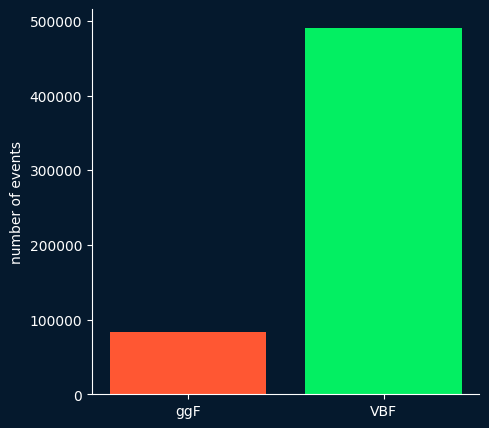

In [139]:
n_ggF = df_ml[df_ml["origin_VBF"] == 0].count()[0]
n_VBF = df_ml[df_ml["origin_VBF"] == 1].count()[0]
plot_cantidad_ggf_vbf(n_ggF, n_VBF)

In [140]:
X_train

,mjj,detajj,dphijj,MET,jet1_pt,jet1_eta,jet1_phi,jet1_e,jet2_pt,jet2_eta,jet2_phi,jet2_e
115020,1591.758301,5.099368,2.169994,148.010239,170647.171875,1.235732,-0.176439,3.186844e+05,89898.531250,-3.863636,-2.346433,2.142282e+06
355791,805.617981,4.141363,2.610950,108.842003,166805.265625,0.295995,1.416657,1.749005e+05,59985.109375,-3.845367,-1.194293,1.403579e+06
237058,1653.152710,5.015224,2.659351,73.512054,138847.437500,-3.621204,-1.502213,2.597124e+06,128950.140625,1.394021,2.121622,2.763953e+05
46739,85.659340,0.691739,-2.936291,26.106403,41345.472656,-0.097843,1.424002,4.183975e+04,38349.734375,-0.789582,-1.922892,5.210277e+04
265284,1305.224243,5.948351,-2.325188,49.157177,104985.812500,2.050709,0.060812,4.148670e+05,42198.917969,-3.897641,2.386000,1.040339e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
307466,2147.366943,5.707787,-2.858450,28.275751,206967.750000,-3.031776,3.011610,2.150644e+06,73495.742188,2.676011,-0.413126,5.363954e+05
81141,407.889862,0.917687,2.433164,185.445343,206467.031250,-0.154786,1.024120,2.099810e+05,180649.609375,-1.072474,-1.409043,2.952926e+05
122961,856.513855,3.455601,-2.554329,60.350166,183657.656250,2.157887,-1.213861,8.053091e+05,119596.398438,-1.297714,1.340468,2.354061e+05
291296,1751.282104,5.756940,0.885858,121.288696,119522.007812,3.490434,2.274755,1.962014e+06,81398.500000,-2.266506,1.388897,3.970333e+05


In [141]:
X_train_weights

115020    0.032195
355791    0.017812
237058    0.005132
46739     0.961761
265284    0.004893
            ...   
307466    0.025053
81141     1.664620
122961    0.027886
291296    0.038025
308645    0.029830
Name: weights, Length: 402530, dtype: float32

In [142]:
2013265/4628576 # eficiencia de njet30>1

0.434964230899525

In [143]:
df_ml2 = df_ml.drop(['jet2_eta', 'jet2_pt', 'jet2_phi', 'origin_ggF', 'dphijj', 'jet1_phi', 'mjj', 'jet1_e', 'jet2_e'], axis=1)

# separo entre datos de entrenamiento y datos de validacion
df_X_2 = df_ml2.drop(['origin_VBF'], axis=1) 
df_y_2 = df_ml2[["origin_VBF"]]

# separo entre datos de entrenamiento y datos de validacion
X_train_w_2, X_metrico_w_2, y_train_2, y_metrico_2 = train_test_split(df_X_2, df_y_2, test_size=0.3)#, random_state=123)
X_test_w_2, X_val_w_2, y_test_2, y_val_2 = train_test_split(X_metrico_w_2, y_metrico_2, test_size=0.5)

X_train_2, X_train_weights_2 = X_train_w_2.drop(['weights'], axis=1), X_train_w_2['weights']
X_test_2, X_test_weights_2 = X_test_w_2.drop(['weights'], axis=1), X_test_w_2['weights']
X_val_2, X_val_weights_2 = X_val_w_2.drop(['weights'], axis=1), X_val_w_2['weights']

# # separo entre datos de entrenamiento y datos de validacion
# X_train, X_metrico, y_train, y_metrico = train_test_split(df_X, df_y, test_size=0.3, random_state=228)
# X_test, X_val, y_test, y_val = train_test_split(X_metrico, y_metrico, test_size=0.5, random_state=228)
# # X_test, y_test = X_metrico, y_metrico 

df_ml2

,detajj,MET,jet1_pt,jet1_eta,weights,origin_VBF
0,0.365666,3.932495,53102.664062,-1.286300,1.750700,0
1,4.895375,60.359543,42754.796875,1.346534,1.664620,0
2,0.327669,54.343163,56689.769531,0.576601,0.809038,0
3,0.094215,74.590981,64039.691406,-2.012894,1.006510,0
4,0.284662,63.892132,34598.937500,-2.065497,0.126785,0
...,...,...,...,...,...,...
575039,4.957650,216.401276,116440.851562,-3.211884,0.009256,1
575040,5.033163,191.440430,134930.218750,3.088001,0.011002,1
575041,5.825066,35.132881,110081.000000,3.609008,0.000271,1
575042,5.037199,97.912659,105132.671875,-0.351721,0.010165,1


detajj


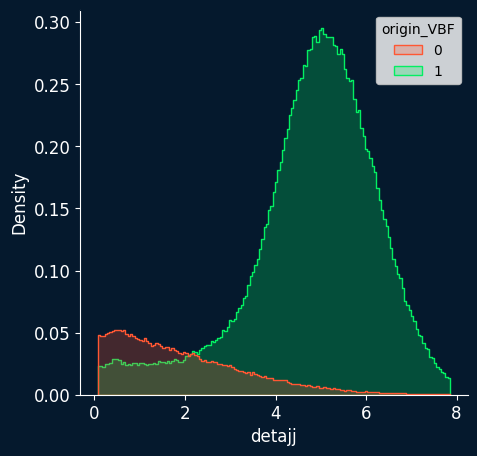

MET


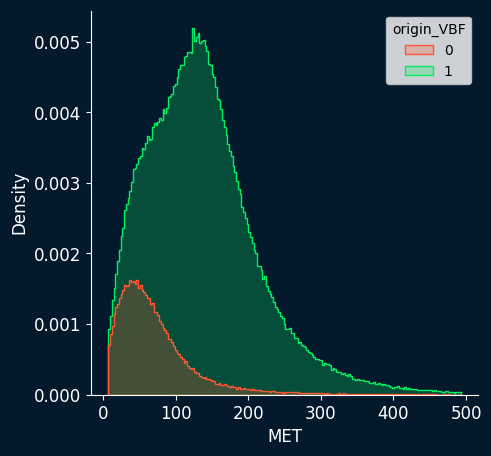

jet1_pt


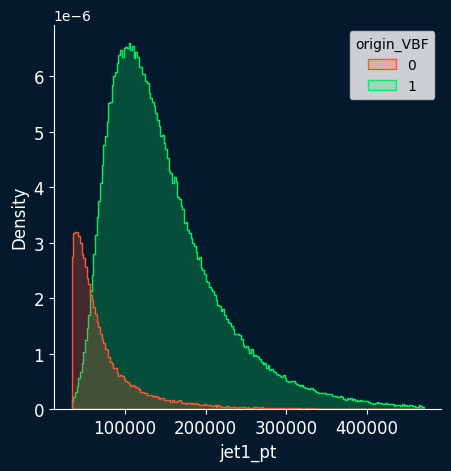

jet1_eta


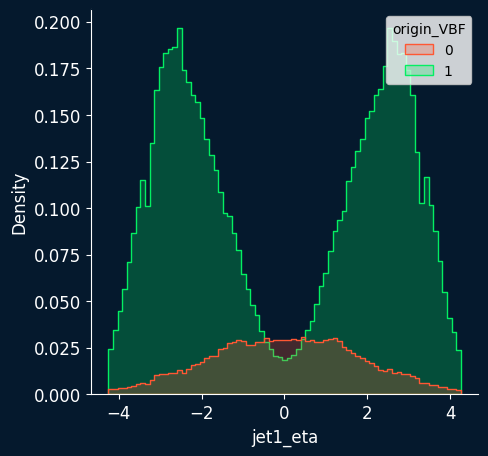

weights


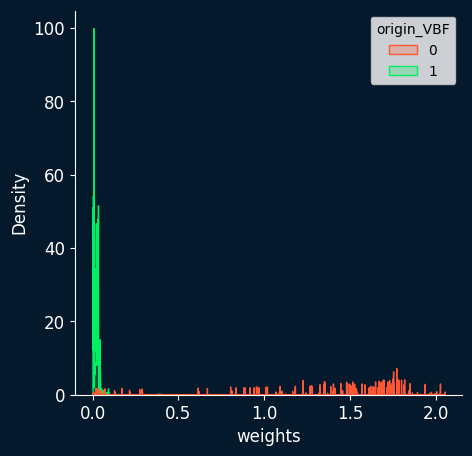

origin_VBF


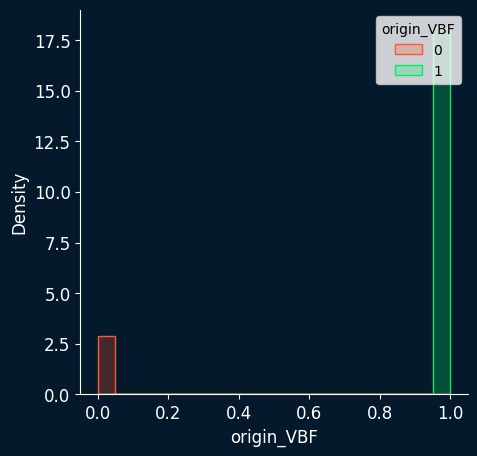

In [144]:
graficar_todos_datos(df_ml2, color='origin_VBF')

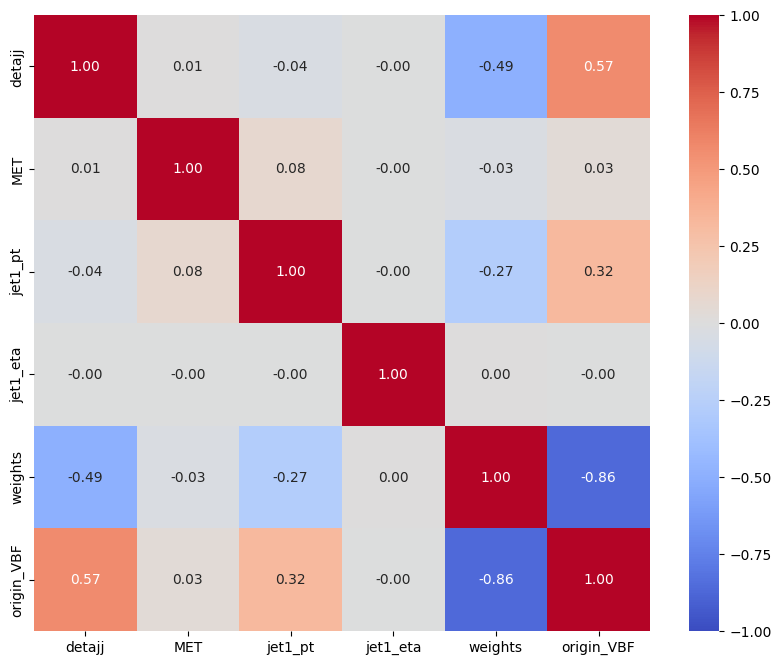

In [145]:
plot_correlacion(df_ml2)

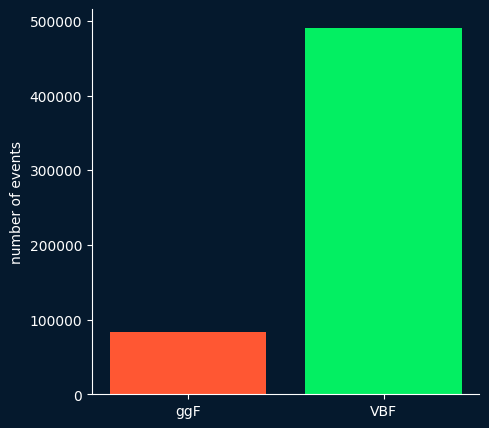

In [146]:
n_ggF = df_ml2[df_ml2["origin_VBF"] == 0].count()[0]
n_VBF = df_ml2[df_ml2["origin_VBF"] == 1].count()[0]
plot_cantidad_ggf_vbf(n_ggF, n_VBF)

118093.59 10909.448


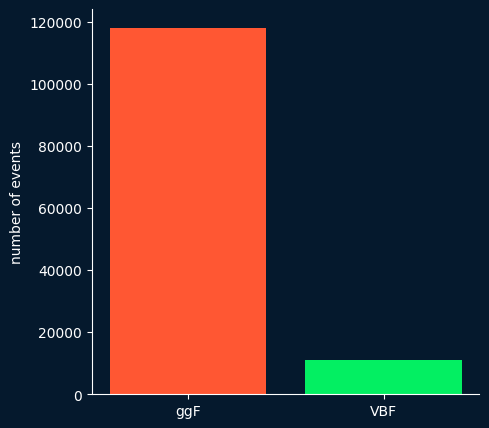

In [167]:
n_ggF = df_ml2[df_ml2["origin_VBF"] == 0]['weights'].sum()
n_VBF = df_ml2[df_ml2["origin_VBF"] == 1]['weights'].sum()
print(n_ggF, n_VBF)
plot_cantidad_ggf_vbf(n_ggF, n_VBF)

# DEEP LEARNING

In [147]:
# Normalizar los datos
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Definir el modelo de la red neuronal
# model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(6,)),  # 4 características en el conjunto de datos Iris
#     tf.keras.layers.Dense(8, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con función de activación sigmoide para clasificación binaria
# ])

# # Compilar el modelo
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# print(y_train.shape)

# # Entrenar el modelo
# model.fit(X_train, y_train, epochs=40, batch_size=16, validation_split=0.1)

# # Evaluar el modelo en el conjunto de prueba
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Loss: {loss}, Accuracy: {accuracy}')

In [148]:
from bokbokbok.eval_metrics.classification import F1_Score_Binary
from sklearn.metrics import f1_score

# params = {'seed': 123,
#           "learning_rate":0.1,
#           "max_depth":7,
#           # "n_estimators":500,
#           "eval_metric":["logloss", "auc"],
#           "verbosity":2,
#           "objective":"binary:logistic",
#           "gamma":0.1, # esto es para evitar el sobreajuste, limita la creacion de ramas
#           # 'disable_default_eval_metric': 1, # no usa las metricas de evaluacion que puse arribita (eval_metric)
#         #   "device":"cuda"
#           }

params = { "n_estimators":25, 
            "max_depth": 8,
            "learning_rate": 0.3,
            "gamma": 0., #min loss reduction required to make a further partition on a leaf node of the tree
            "alpha": 0., #L1 regularization, mientras mayor es mas conservador
            "min_child_weight": 1, #min sum of weights of all observations required in a child
            "reg_lambda":1,  # L2 regularization, mientras mayor es mas conservador	

            "eval_metric": ["logloss", "auc", "error"],
            "early_stopping_rounds": 5, # Para evitar overfitting
            #"objective":"count:poisson",
            #"objective":"binary:hinge",
            "objective":"binary:logistic",
            "booster": "gbtree",
            "scale_pos_weight": 5.5,
            "verbosity": 1
            }

dtrain = xgb.DMatrix(X_train_2, y_train_2, weight=X_train_weights_2)
dvalid = xgb.DMatrix(X_val_2, y_val_2, weight=X_val_weights_2)

modelo_boost = xgb.train(params,
          dtrain=dtrain,
          num_boost_round=100,
          early_stopping_rounds=10,
          verbose_eval=10,
          maximize=True,
          custom_metric=F1_Score_Binary(average='binary', XGBoost=True),
          # custom_metric=f1_score(average='micro'),
          evals=[(dtrain, 'dtrain'), (dvalid, 'dvalid')])

model = XGBRegressor()
model._Booster = modelo_boost

/home/tomilee/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [21:10:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_rounds", "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	dtrain-logloss:0.35241	dtrain-auc:0.97129	dtrain-error:0.04097	dtrain-F1:0.87389	dvalid-logloss:0.35373	dvalid-auc:0.96985	dvalid-error:0.04335	dvalid-F1:0.87488
[10]	dtrain-logloss:0.14799	dtrain-auc:0.97713	dtrain-error:0.04843	dtrain-F1:0.93807	dvalid-logloss:0.16352	dvalid-auc:0.97283	dvalid-error:0.05670	dvalid-F1:0.93753
[20]	dtrain-logloss:0.13783	dtrain-auc:0.97916	dtrain-error:0.04757	dtrain-F1:0.94028	dvalid-logloss:0.16304	dvalid-auc:0.97275	dvalid-error:0.05770	dvalid-F1:0.93937
[30]	dtrain-logloss:0.13255	dtrain-auc:0.98066	dtrain-error:0.04633	dtrain-F1:0.94133	dvalid-logloss:0.16548	dvalid-auc:0.97245	dvalid-error:0.05915	dvalid-F1:0.94000
[40]	dtrain-logloss:0.12705	dtrain-auc:0.98197	dtrain-error:0.04458	dtrain-F1:0.94233	dvalid-logloss:0.16927	dvalid-auc:0.97194	dvalid-error:0.05982	dvalid-F1:0.94085
[50]	dtrain-logloss:0.12294	dtrain-auc:0.98297	dtrain-error:0.04366	dtrain-F1:0.94322	dvalid-logloss:0.17188	dvalid-auc:0.97164	dvalid-error:0.06091	dvalid-F1:0.94141

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.703804 to fit


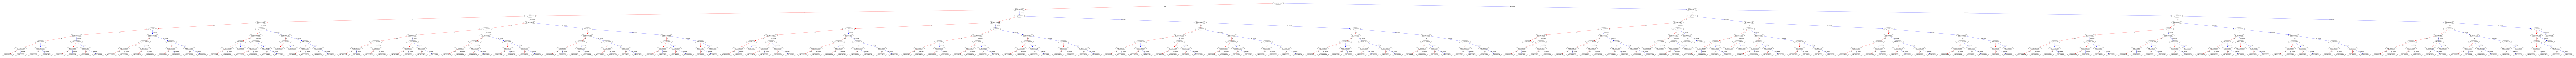

In [149]:
grafico_decisiones(model)

In [150]:
precision(model, X_test_2, y_test_2)

Precisión del modelo: 90.54%


In [151]:
y_pred_2 = model.predict(X_test_2)
y_pred_2 = y_pred_2>0.5
matriz = confusion(y_test_2, y_pred_2, weight=X_test_weights_2)
pd.DataFrame(matriz)

,0,1
0,1484.077829,158.192565
1,1111.199520,16721.559426


In [152]:
from sklearn.metrics import f1_score
y_pred_2 = model.predict(X_test_2)
f1_score(y_test_2, y_pred_2>0.5)

0.9419809778359091

In [153]:
eficiencia_antes = eficiencia_corte_matriz(matriz)
print(eficiencia_corte_matriz(matriz))

0.1332617940465795


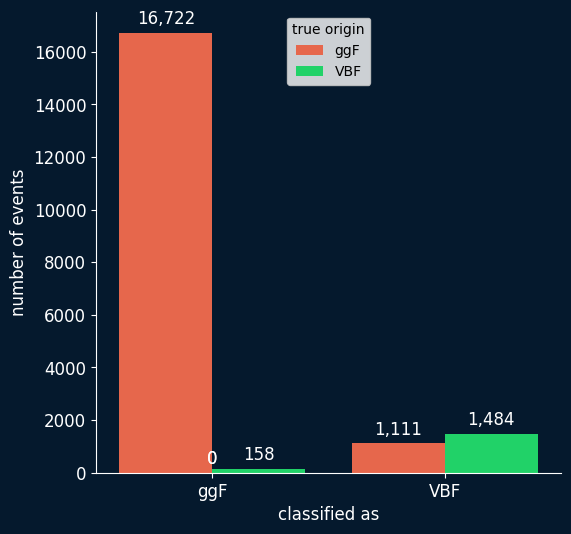

In [154]:
plot_confusion_barras(matriz, normalizado=False)

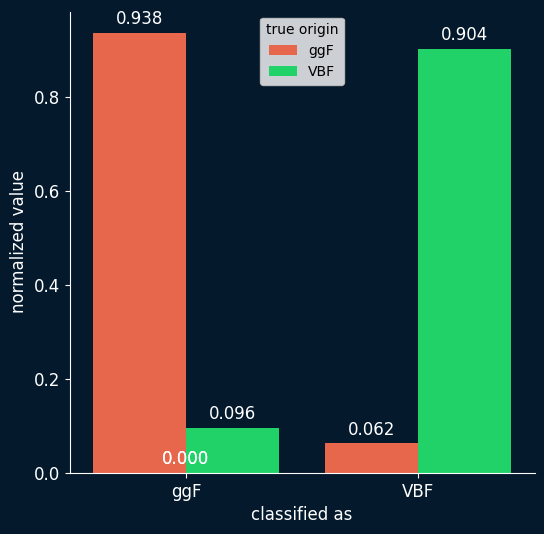

In [155]:
plot_confusion_barras(matriz)

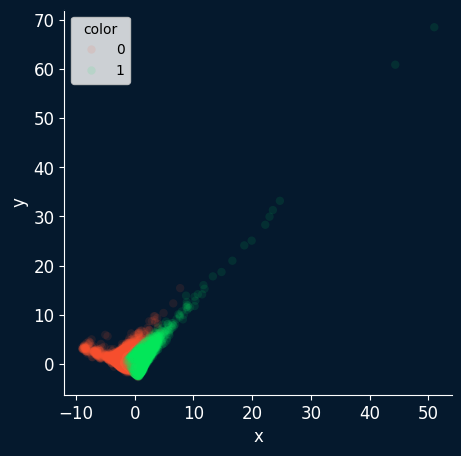

In [156]:
plot_pca_2D(model, 
            df_X_2.sample(100000, random_state=123), 
            df_y_2.sample(100000, random_state=123))

In [157]:
# y_pred_all = model.predict(X_test)>0.5

In [158]:
# y_pred = pd.DataFrame(y_pred_all).sample(100000, random_state=123)

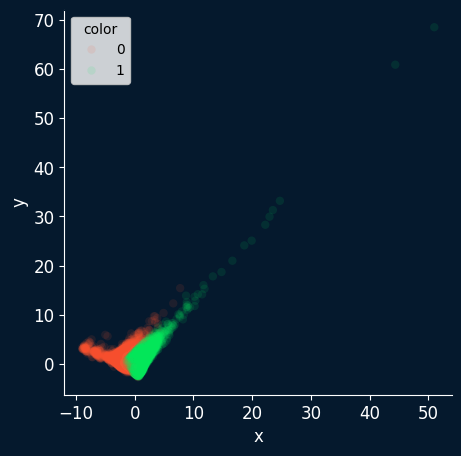

In [159]:
plot_pca_2D(model, 
            df_X_2.sample(100000, random_state=123), 
            df_y_2.sample(100000, random_state=123))
        #  pd.DataFrame(modelo.predict(df_X)).sample(100000, random_state=123))

# AQUI HAGO EL CORTE SOBRE 0.9TeV

In [160]:
df_X = df_ml2.drop(['origin_VBF'], axis=1) 
df_y = df_ml2[["origin_VBF"]]

# separo entre datos de entrenamiento y datos de validacion
X_train, X_metrico, y_train, y_metrico = train_test_split(df_X, df_y, test_size=0.3, random_state=228)
X_test, X_val, y_test, y_val = train_test_split(X_metrico, y_metrico, test_size=0.5, random_state=228)
# X_test, y_test = X_metrico, y_metrico 

detajj


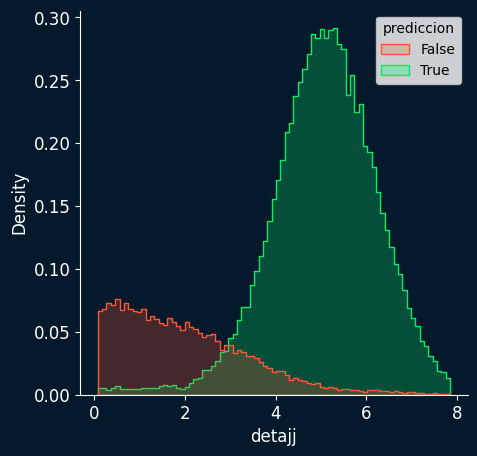

MET


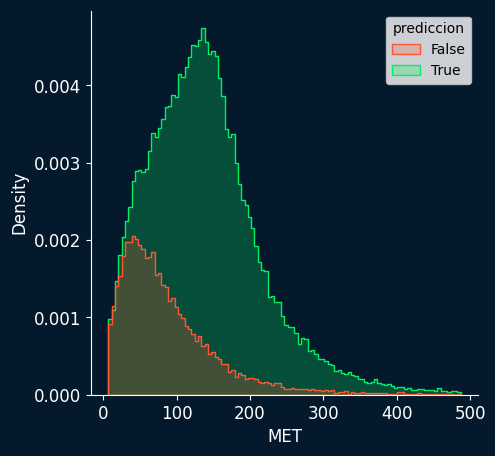

jet1_pt


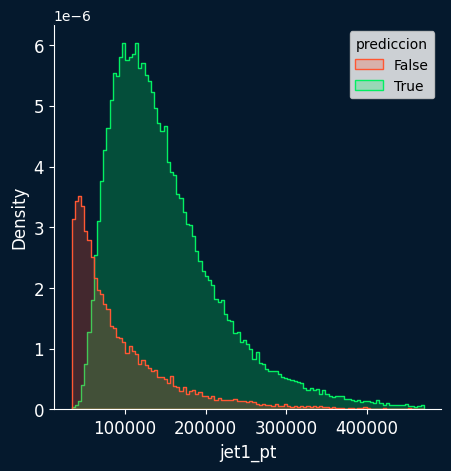

jet1_eta


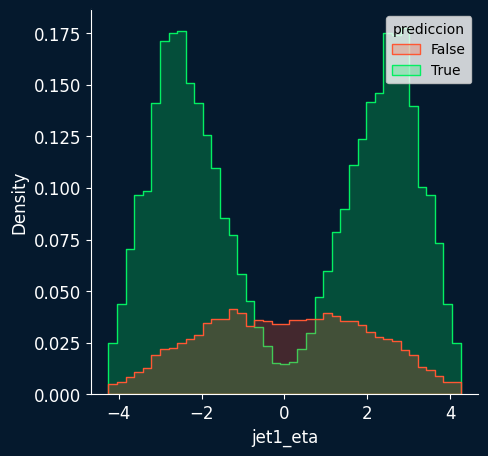

prediccion


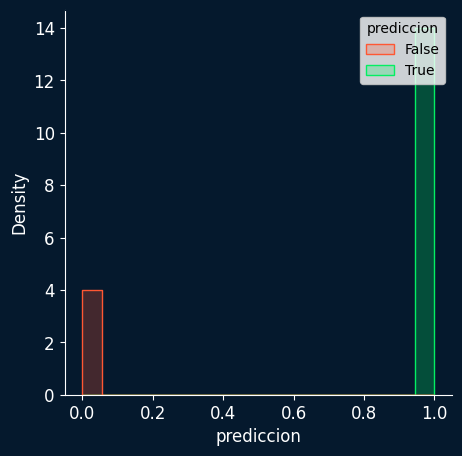

In [161]:
# df_ml3 = df_ml2
df_ml3 = X_test_2.copy(deep=True)
try: 
    df_ml3 = df_ml3.drop(['prediccion'], axis=1) # por si lo corro 2 veces y se queda guardado 'prediccion'
except:
    pass
try: 
    df_ml3 = df_ml3.drop(['origin_VBF'], axis=1) # por si lo corro 2 veces y se queda guardado 'prediccion'
except:
    pass
df_ml3['prediccion'] = model.predict(df_ml3)>0.5
graficar_todos_datos(df_ml3, color='prediccion')

In [162]:
# df_plot = df_X[(df_X > df_X.quantile(0.005)) & (df_X < df_X.quantile(0.995))]

# df_plot.hist(bins=30, figsize=(15, 10))

In [163]:
X_test

,detajj,MET,jet1_pt,jet1_eta,weights
359025,6.273952,257.050690,142936.781250,-3.172587,0.004217
286612,5.150429,54.232521,105475.843750,2.650430,0.019825
506077,4.779883,79.472481,112080.562500,3.074895,0.024163
457418,4.516220,31.556051,135286.359375,-3.235537,0.027258
65613,3.265352,33.324657,38818.359375,0.196024,1.748162
...,...,...,...,...,...
382465,5.094595,209.272781,176306.625000,-2.429013,0.004419
212288,4.712134,149.400177,140560.000000,1.677283,0.014464
437302,6.158503,22.362970,115142.492188,3.744999,0.043307
277503,6.628243,111.023323,113652.437500,-3.234229,0.018641


In [164]:
# X_val

In [165]:
# funcion que voy a usar para la clasificacion
# estop se va a aplicar a cada fila
def clasificacion_after(pred_VBF_modelo, pred_VBF_mjj):
    # si está por arriba de 0.9TeV, entonces es VBF
    if pred_VBF_mjj == 1:
        return 1
    # en otro caso mantengo la predicción, puede ser VBF o ggF
    else:
        return pred_VBF_modelo

# función que me entrega una predicción en base al corte original de ML y al corte en 0.9TeV
def aplicar_clasificacion_despues(modelo, df_x):
    # creo un df vacío
    df_comprobar = pd.DataFrame()
    
    # pongo la predicción del modelo en el df
    df_comprobar['pred_VBF_modelo'] = modelo.predict(df_x) # [:, 0]
    
    # pongo la predicción del filtro 0.9TeV en el df
    # filtro_mjj = df_x["mjj"] >= 900 # este es el bueno
    filtro_mjj = df_x["mjj"] >= 900
    df_comprobar['pred_VBF_mjj'] = np.where(filtro_mjj, 1, 0)

    # aplico la función que mostré antes para obtener la predicción final
    pred_VBF_modelo_y_mjj = df_comprobar.apply(lambda fila: clasificacion_after(fila['pred_VBF_modelo'], 
                                                                        fila['pred_VBF_mjj']), axis=1)
    
    # entrego la predicción final
    return pred_VBF_modelo_y_mjj

pred_VBF_modelo_y_mjj = aplicar_clasificacion_despues(model, X_test_2)
pred_VBF_modelo_y_mjj

KeyError: 'mjj'

In [ ]:
y_pred_2 = pred_VBF_modelo_y_mjj.to_numpy()
y_pred_2 = y_pred_2>0.5
matriz_2 = confusion(y_test, y_pred_2)
pd.DataFrame(matriz_2)

,0,1
0,64079,9559
1,8734,219514


In [ ]:
print(eficiencia_corte_matriz(matriz_2))

0.24119369563345103


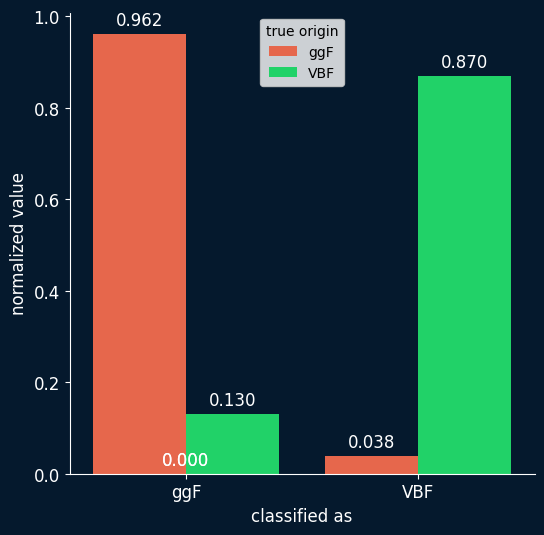

In [ ]:
plot_confusion_barras(matriz_2)

In [ ]:
precision(model, X_test, y_test)

Precisión del modelo: 94.28%


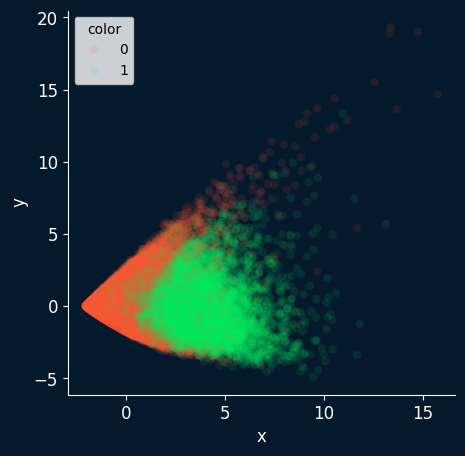

In [ ]:
plot_pca_2D(model, 
            df_X.sample(100000, random_state=123), 
            df_y.sample(100000, random_state=123))

mjj


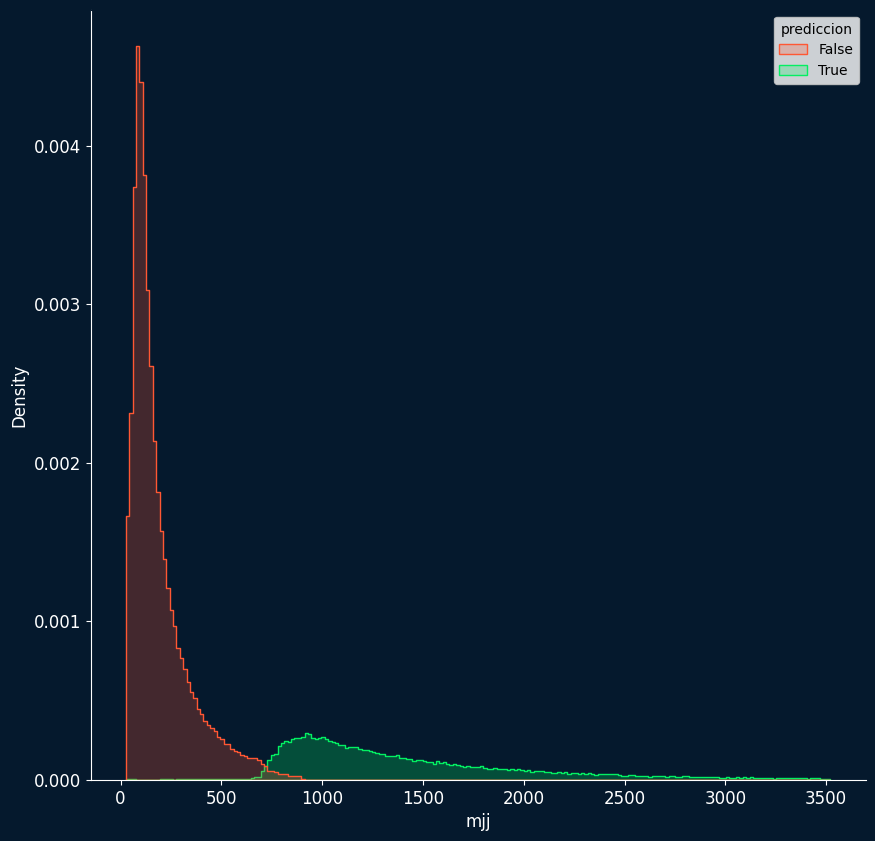

detajj


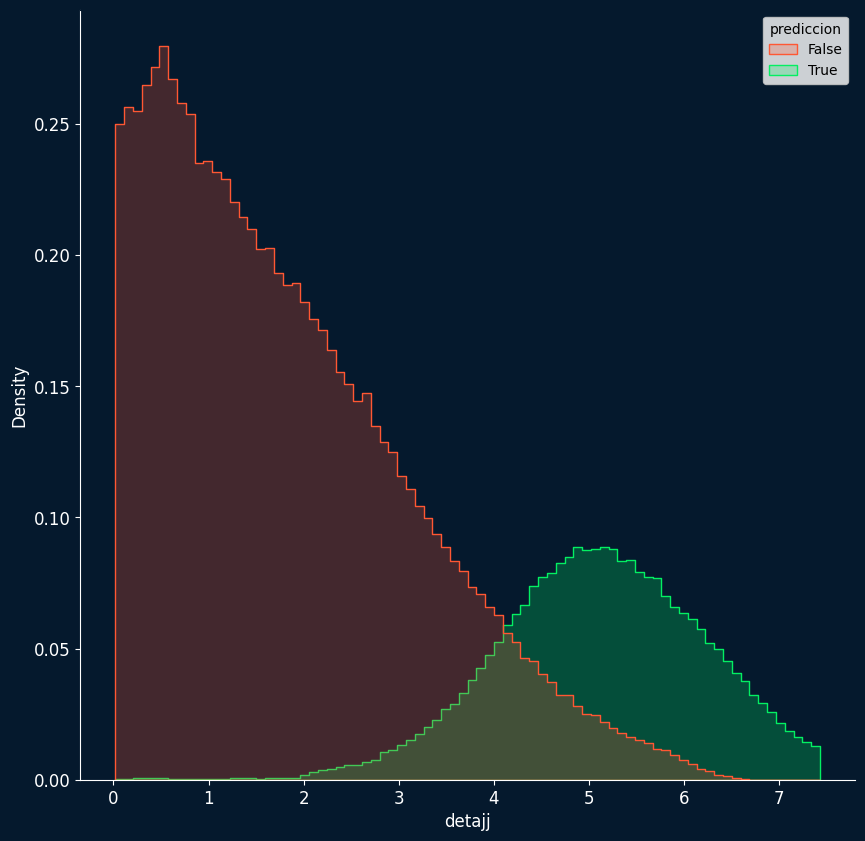

jet1_pt


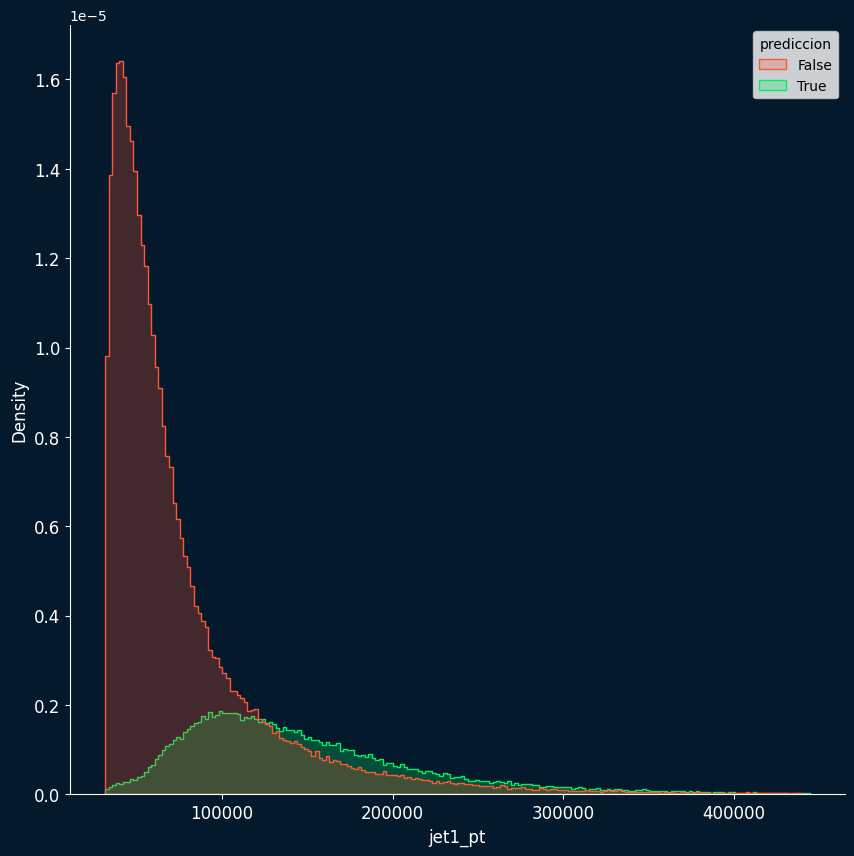

jet1_e


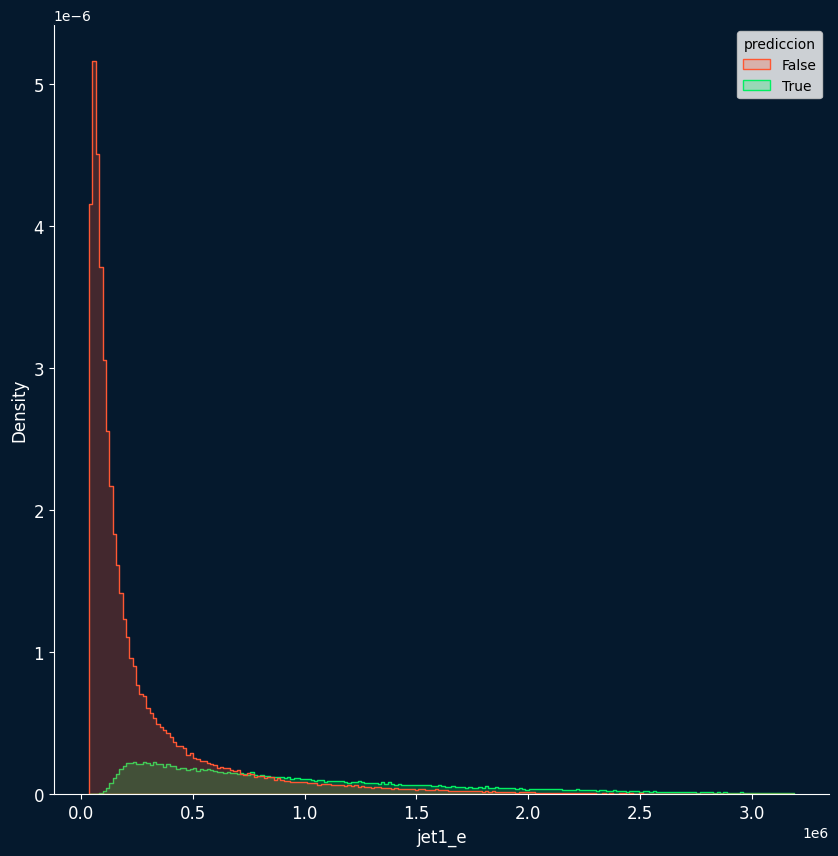

jet2_pt


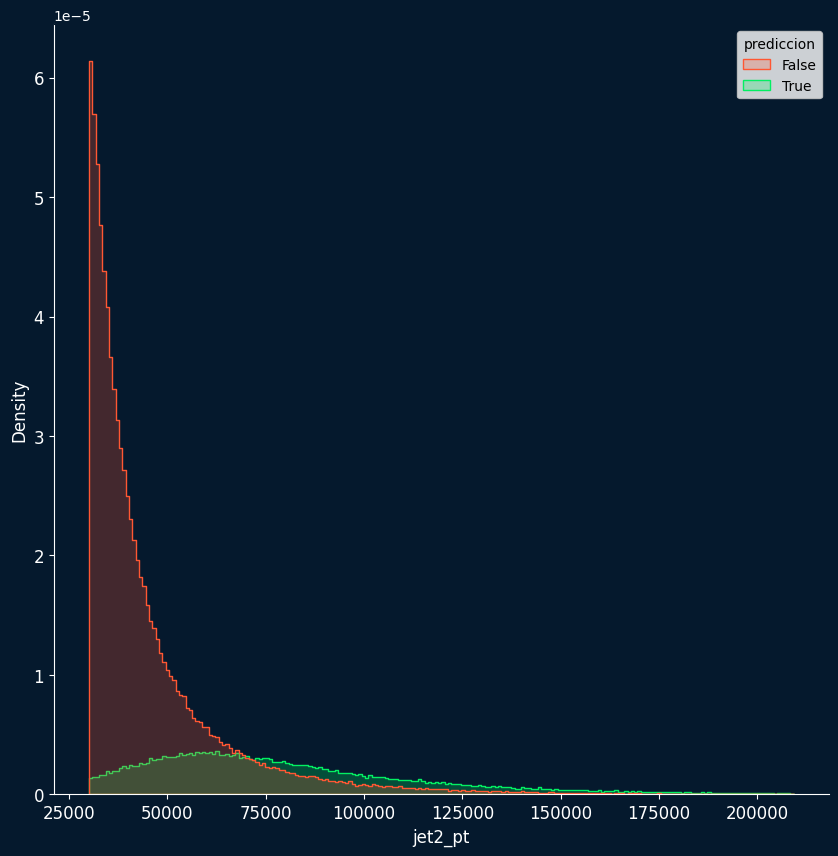

jet2_e


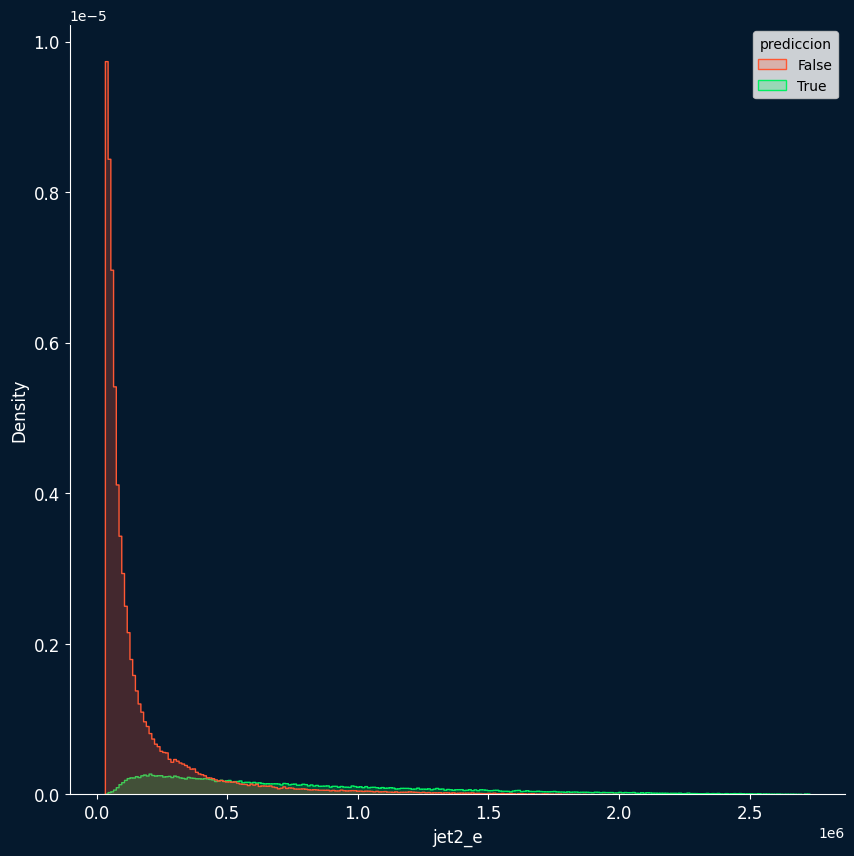

prediccion


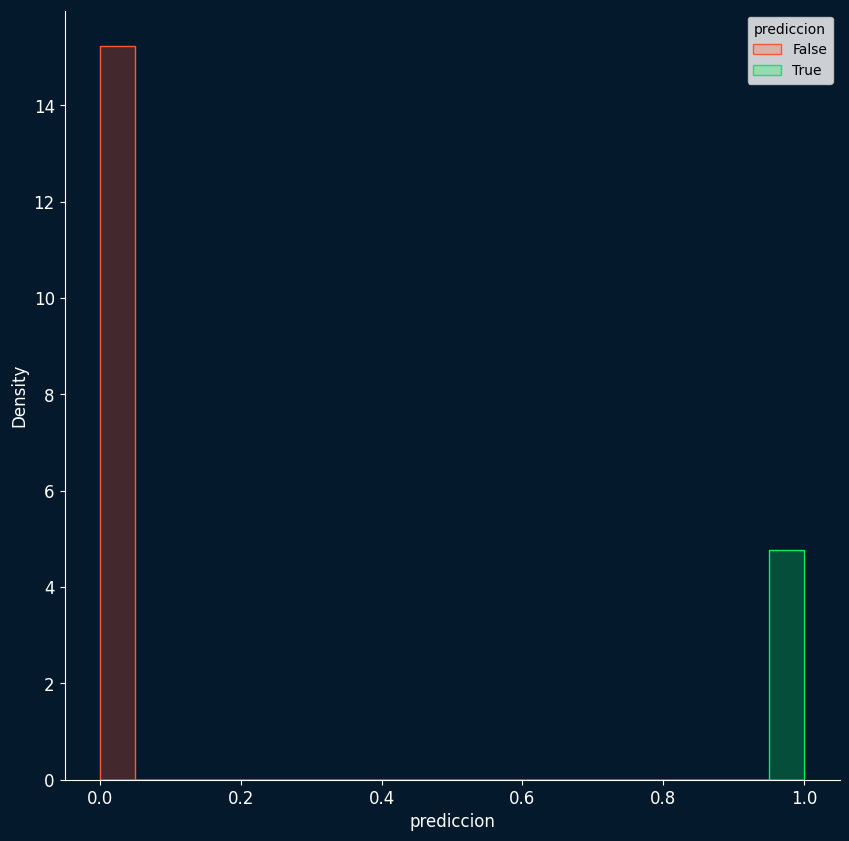

In [ ]:
df_ml4 = X_test.copy(deep=True)
df_ml4 = df_ml4.reset_index(drop=True) # tengo que poner eso porque al ser elegido aleatoriamente, los indices quedan aleatorios y causa problemas con otros df en la función que sigue
try: 
    df_ml4 = df_ml4.drop(['prediccion'], axis=1) # por si lo corro 2 veces y se queda guardado 'prediccion'
except:
    pass
df_ml4['prediccion'] = aplicar_clasificacion_despues(model, df_ml4)>0.5
graficar_todos_datos(df_ml4, color='prediccion')

# QUE PASA SI HAGO EL CORTE 0.9 AHORA?

In [ ]:
print(df_ml2[df_ml2['mjj'] > 900].count()/df_ml2.count())

mjj           0.199006
detajj        0.199006
jet1_pt       0.199006
jet1_e        0.199006
jet2_pt       0.199006
jet2_e        0.199006
origin_VBF    0.199006
dtype: float64


mjj


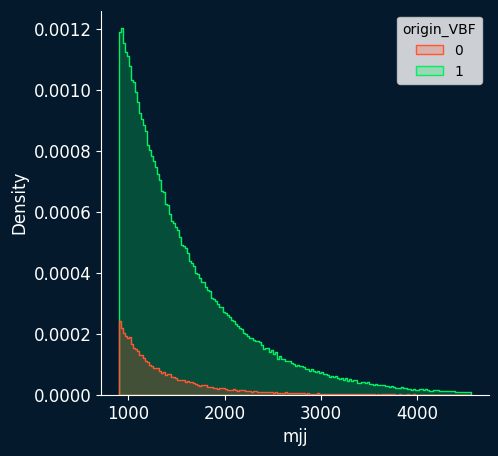

detajj


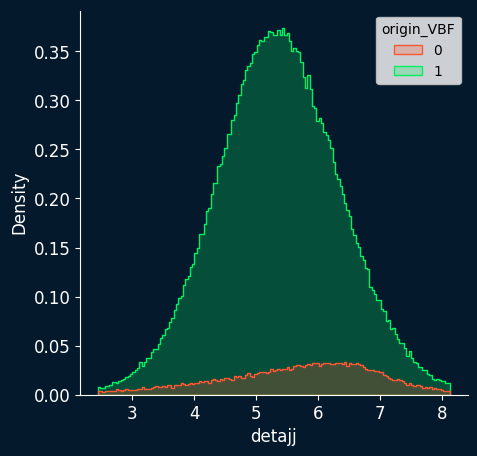

jet1_pt


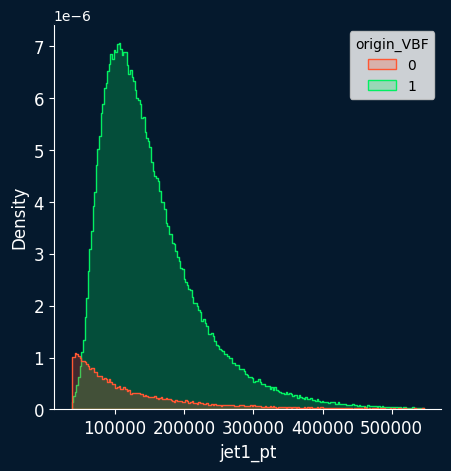

jet1_e


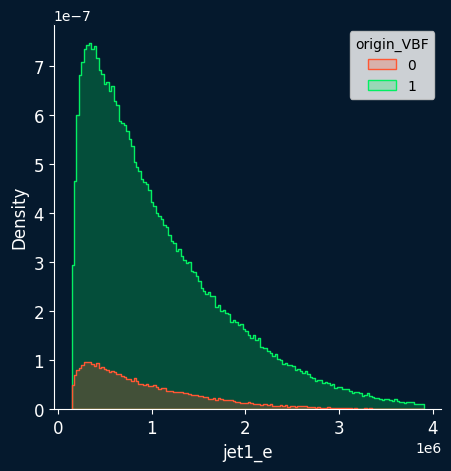

jet2_pt


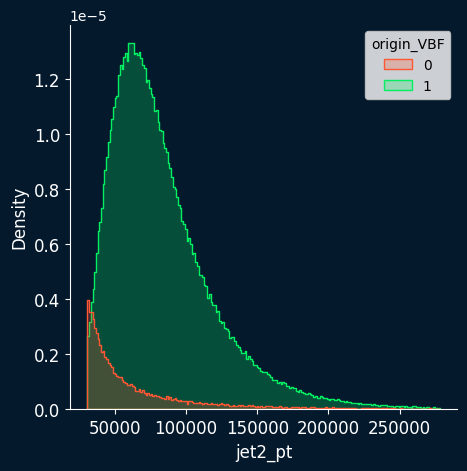

jet2_e


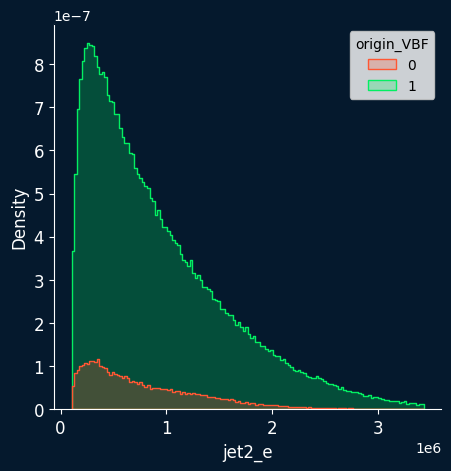

origin_VBF


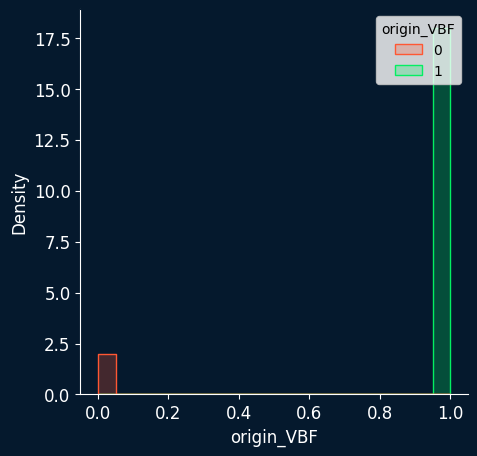

In [ ]:
df_ml5 = df_ml2[df_ml2['mjj'] > 900].copy(deep=True)
df_X_5 = df_ml5.drop(['origin_VBF'], axis=1) 
df_y_5 = df_ml5[["origin_VBF"]]

# separo entre datos de entrenamiento y datos de validacion
X_train_5, X_metrico_5, y_train_5, y_metrico_5 = train_test_split(df_X_5, df_y_5, test_size=0.3, random_state=228)
X_test_5, X_val_5, y_test_5, y_val_5 = train_test_split(X_metrico_5, y_metrico_5, test_size=0.5, random_state=228)
graficar_todos_datos(df_ml5, color='origin_VBF')

In [ ]:
X_test_5[X_test_5['mjj']>900].describe()

,mjj,detajj,jet1_pt,jet1_e,jet2_pt,jet2_e
count,60077.000000,60077.000000,6.007700e+04,6.007700e+04,60077.000000,6.007700e+04
mean,1598.689575,5.386377,1.518811e+05,1.072183e+06,83466.437500,9.271103e+05
std,701.437622,1.057382,8.798320e+04,7.823804e+05,44176.574219,6.875722e+05
min,900.000732,0.024695,3.005420e+04,9.184362e+04,30002.447266,4.832735e+04
25%,1097.088135,4.703257,9.564443e+04,4.726216e+05,54909.808594,3.951161e+05
50%,1377.965088,5.382225,1.314547e+05,8.528389e+05,73528.703125,7.408839e+05
75%,1864.820557,6.082702,1.828731e+05,1.471111e+06,99656.570312,1.284922e+06
max,8305.770508,9.194850,1.768984e+06,6.061900e+06,977842.625000,5.364323e+06


In [ ]:
precision(model, X_test_5, y_test_5)

Precisión del modelo: 91.76%


In [ ]:
from sklearn.metrics import f1_score
y_pred_5 = model.predict(X_test_5)
f1_score(y_test_5, y_pred_5>0.5)

0.9557457234577175

In [ ]:
y_pred_5 = model.predict(X_test_5)
y_pred_5 = y_pred_5>0.5
matriz_5 = confusion(y_test_5, y_pred_5)
pd.DataFrame(matriz_5)

,0,1
0,53441,541
1,4408,1687


In [ ]:
eficiencia_antes = eficiencia_corte_matriz(matriz_5)
print(eficiencia_corte_matriz(matriz_5))

0.9629142600329577


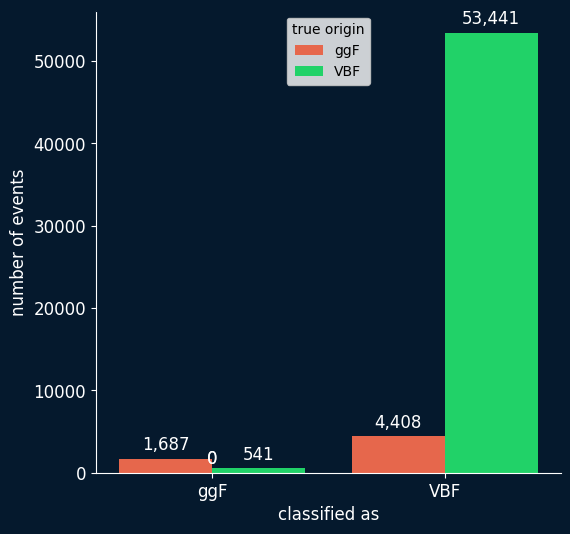

In [ ]:
plot_confusion_barras(matriz_5, normalizado=False)

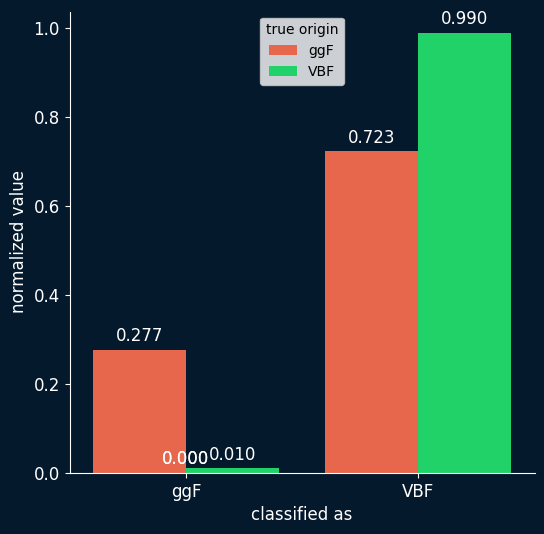

In [ ]:
plot_confusion_barras(matriz_5)

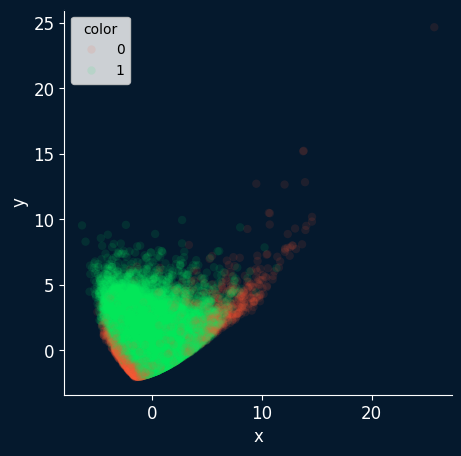

In [ ]:
plot_pca_2D(model, 
            df_X_5.sample(100000, random_state=123), 
            df_y_5.sample(100000, random_state=123))

0        True
1        True
2        True
3        True
4        True
         ... 
60184    True
60185    True
60186    True
60187    True
60188    True
Name: prediccion, Length: 60189, dtype: bool
mjj


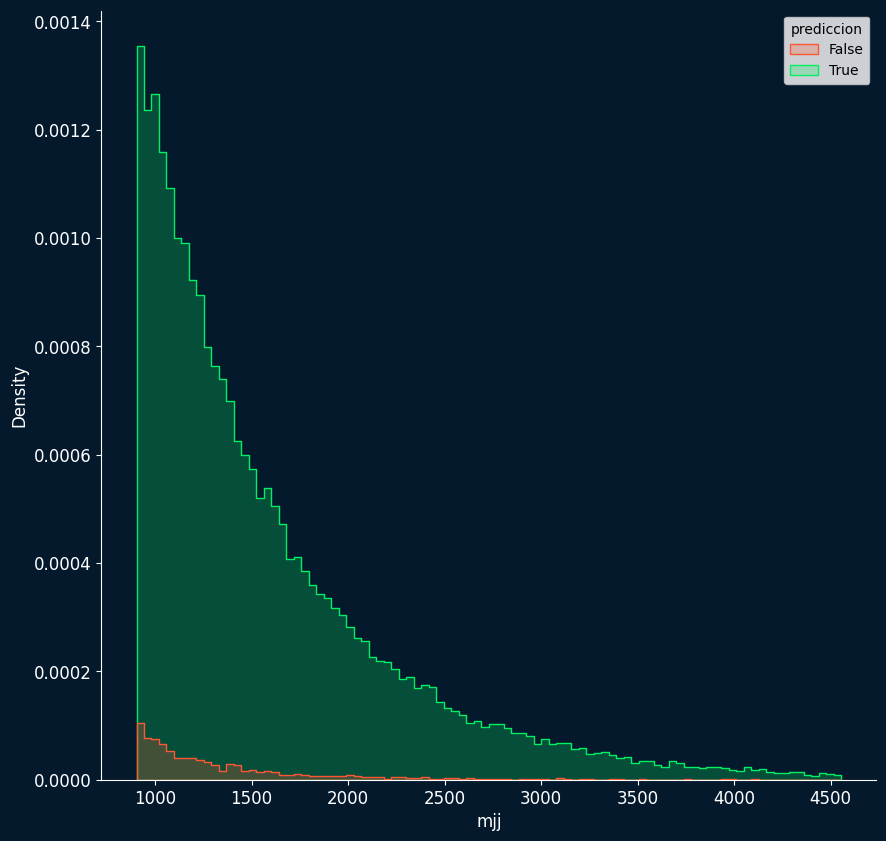

detajj


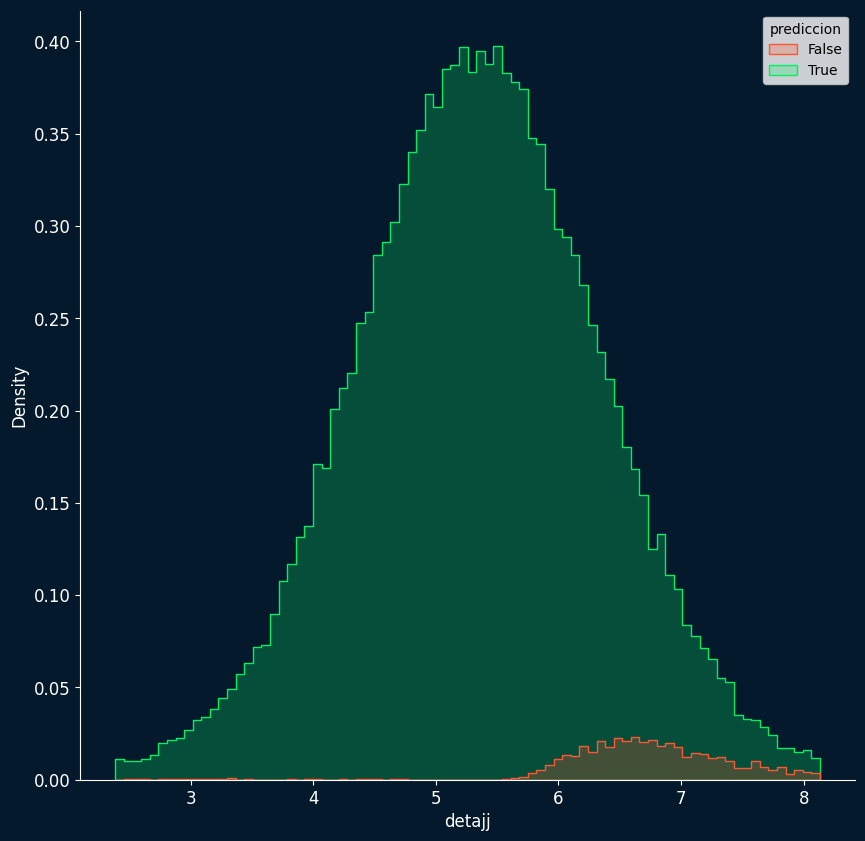

jet1_pt


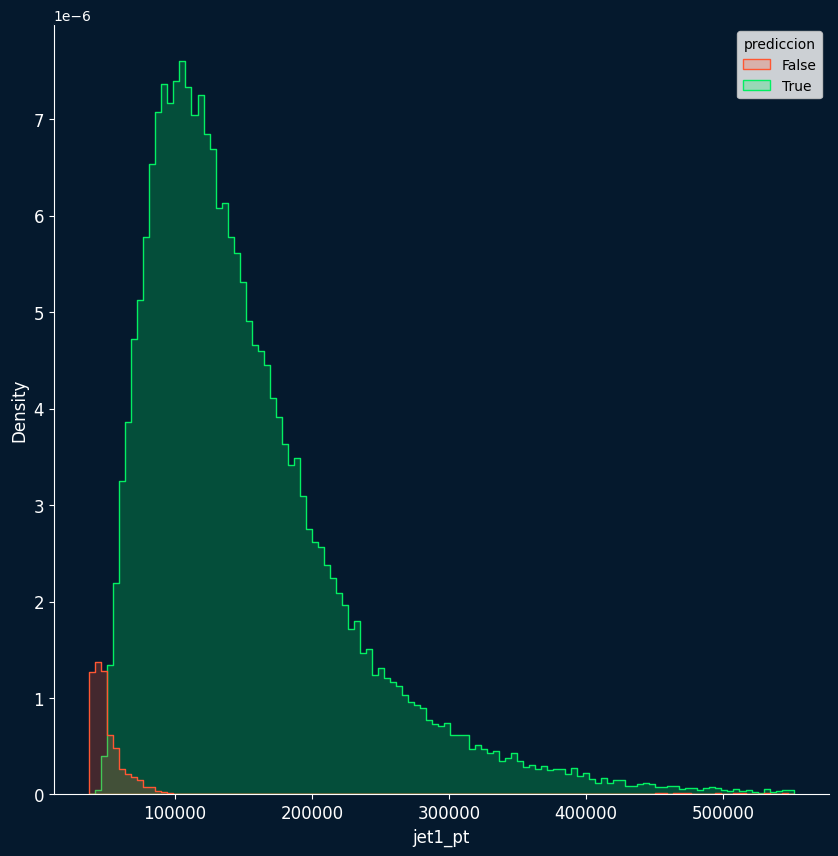

jet1_e


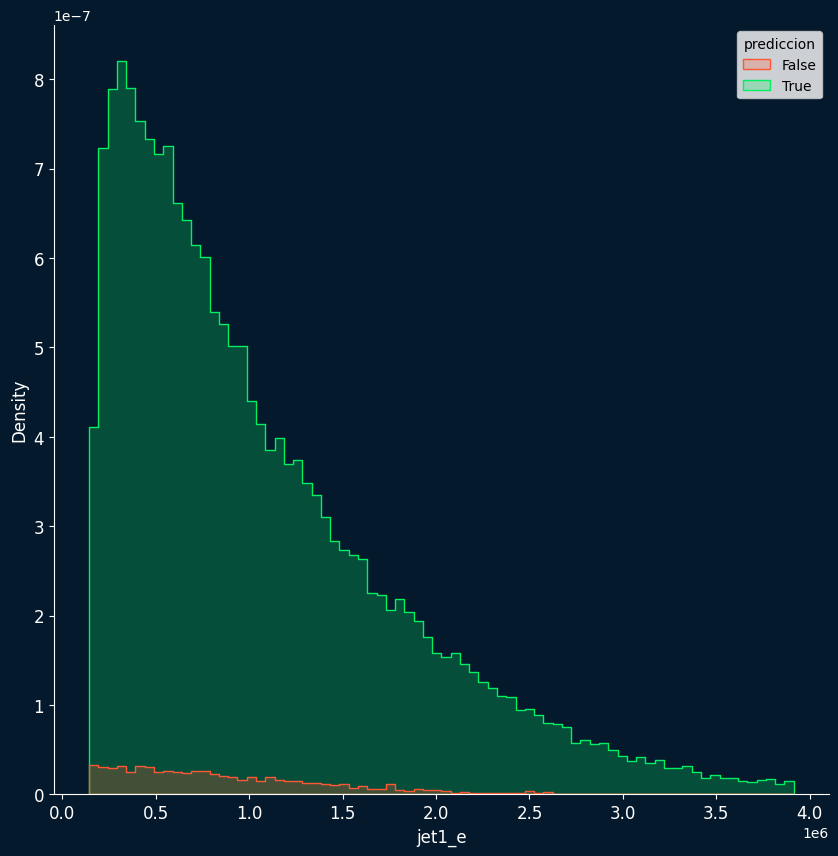

jet2_pt


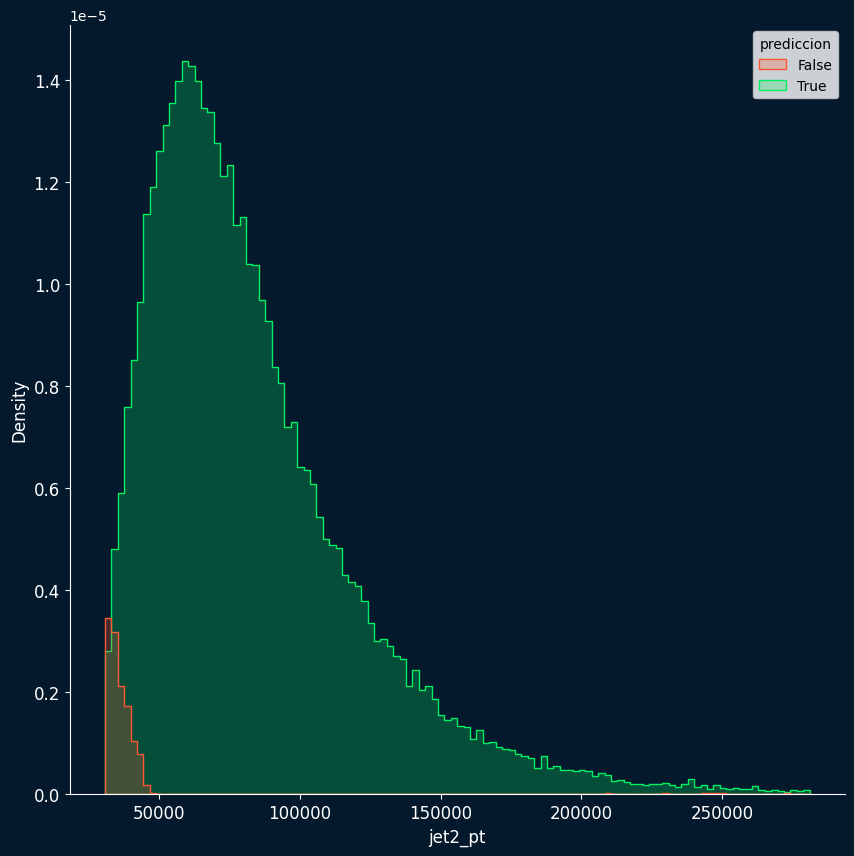

jet2_e


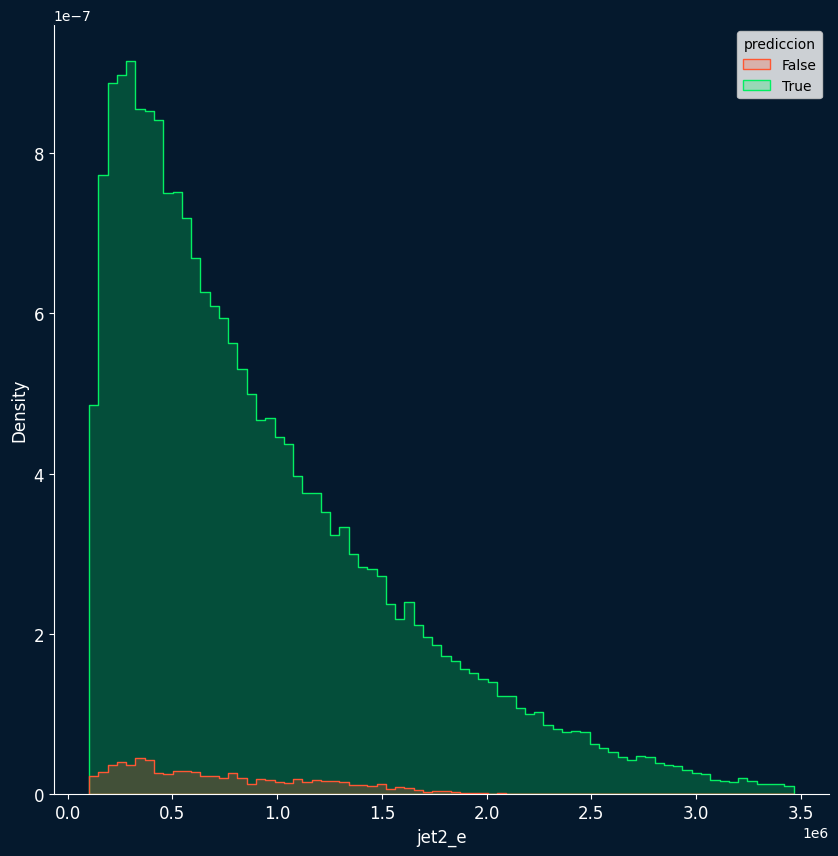

prediccion


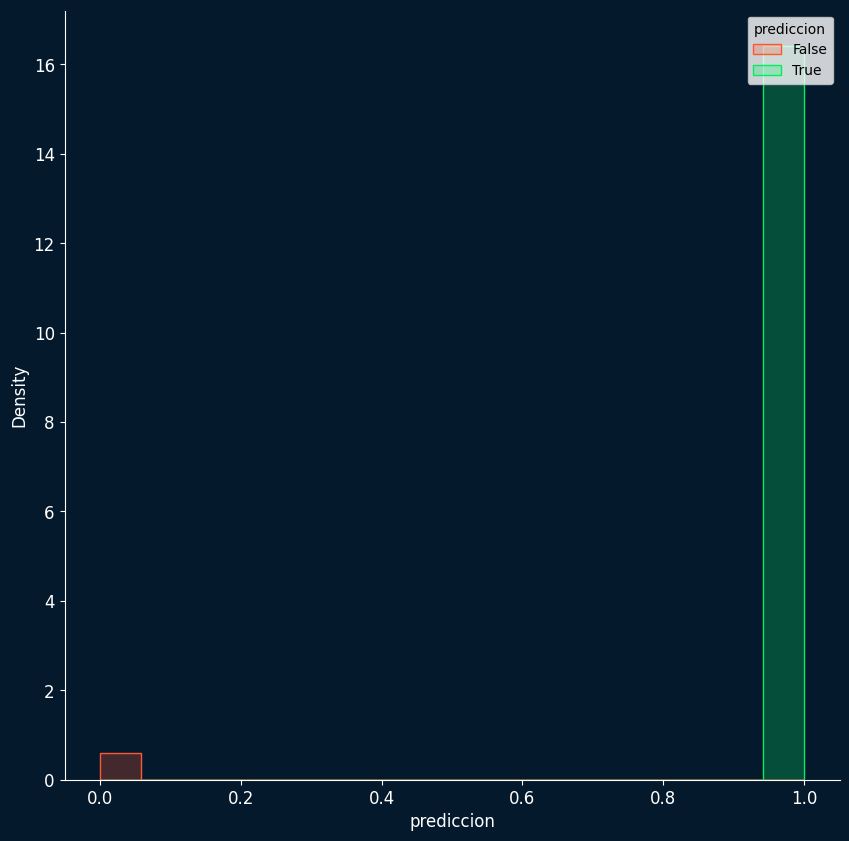

In [ ]:
df_ml6 = X_test[X_test['mjj']>900].copy(deep=True)
df_ml6 = df_ml6.reset_index(drop=True) # tengo que poner eso porque al ser elegido aleatoriamente, los indices quedan aleatorios y causa problemas con otros df en la función que sigue
try: 
    df_ml6 = df_ml6.drop(['prediccion'], axis=1) # por si lo corro 2 veces y se queda guardado 'prediccion'
except:
    # df_ml6['prediccion'] = aplicar_clasificacion_despues(model, df_ml6)
    df_ml6['prediccion'] = model.predict(df_ml6)>0.5
print(df_ml6['prediccion'])
graficar_todos_datos(df_ml6, color='prediccion')